<a href="https://colab.research.google.com/github/enidroman/Math-With-Python/blob/main/MATH_HW_1_Enid_Roman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CHAPTER 1: Even Odd Vending Machine

In [79]:
# even_odd_vending.py
# Print whether the input is even or odd. 
# If even, print the next 9 even numbers
# If odd, print the next 9 odd numbers.

def even_odd_vending(num):
    
    if num % 2 == 0:
        print("even")
    else:
        print("odd")
    count = 1

    while count <= 9:
      num += 2
      print(num)
      # increment the count of numbers printed
      count += 1

if __name__ == '__main__': 
  try:
    num = float(input('Enter an integer: '))
    if num.is_integer():
      even_odd_vending(int(num))
    else:
      print('Please enter an integer')
  except ValueError:
      print('Please enter a number')


    



Enter an integer: 62
even
64
66
68
70
72
74
76
78
80


#CHAPTER 2: Exploring a Quadratic Function Visually


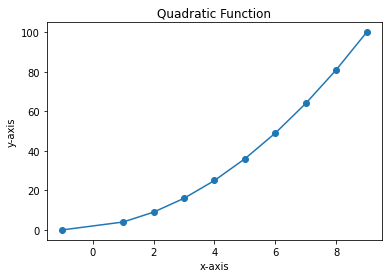

In [89]:
# quad_function_plot.py
# Plot a quadratic function.

import matplotlib.pyplot as plt

def quad_func_calc():
    x_values = [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    y_values = []
    for x in x_values:
        # Calculate the value of quadratic function
        y_values.append(x**2 + x * 2 + 1)
    draw_graph(x_values, y_values)

def draw_graph(x, y):
    plt.plot(x, y, marker='o')
    plt.xlabel('x-axis')

    plt.ylabel('y-axis')
    plt.title('Quadratic Function')
  
if __name__ == '__main__':
    quad_func_calc()

# CHAPTER 3: Statistics Calculator

In [90]:
# statistics_calculator.py
# Read numbers from a file, calculate and print statistical measures:
# mean, median, mode variance, statndard deviation

import stats
from stats import *

def read_data(filename):
    numbers = []
    with open(filename) as f:
      for line in f:
        numbers.append(float(line))

    return numbers

if __name__=='__main__':
  data =  read_data('mydata.txt')
  m = mean(data)
  median = median(data)
  mode = mode(data)
  variance = variance(data)
  sd = stdev(data)

  print('Mean: {0:.5f}'.format(m))
  print('Median: {0:5f}'.format(median))
  print('Mode: {0:.5f}'.format(mode))
  print('Variance: {0:.5f}'.format(variance))
  print('Standard deviation: {0:.5f}'.format(sd))


Mean: 412.18182
Median: 500.000000
Mode: 100.00000
Variance: 112367.76364
Standard deviation: 335.21301


# CHAPTER 4: Solving Single-Variable Inequalities


In [22]:
# isolve.py
# Single variable inequality solver

from sympy import Symbol, sympify, SympifyError
from sympy import solve_poly_inequality, solve_rational_inequalities
from sympy import solve_univariate_inequality, Poly
from sympy.core.relational import Relational, Equality

def isolve(ineq_obj):
  x= Symbol('x')

  expr = ineq_obj.lhs
  rel = ineq_obj.rel_op

  if expr.is_polynomial():
    p = Poly(expr, x)
    return solve_poly_inequality(p, rel)
  elif expr.is_rational_function():
    p1, p2 = expr.as_numer_denom()
    num = Poly(p1)
    denom = Poly(p2)
    return solve_rational_inequalities([[((num, denum), rel)]])
  else:
    return solve_univariate_inequality(ineq_obj , x, relational=False)

if __name__ == '__main__':
  ineq = input('Enter the inequality to solve: ')
  try:
      ineq_obj = sympify(ineq)
  except SympifyError:
      print('Invalid inequality')
  else:
    # We check if the input expression is an inequality here
    if isinstance(ineq_obj, Relational) and not isinstance(ineq_obj, Equality):
      print(isolve(ineq_obj))
    else:
      print('Invalid inquality')


Enter the inequality to solve: -x**2 + 4 <0
[Interval.open(-oo, -2), Interval.open(2, oo)]


# CHAPTER 5: Law of Large Numbers
---



In [25]:
# law_ln.py
# Verify the law of large numbers using a six-sided die roll as an example

import random

def roll(num_trials):
    rolls = []
    for t in range(num_trials):
      rolls.append(random.randint(1, 6))
    return sum(rolls)/num_trials

if __name__ == '__main__':
  expected_value = 3.5
  print('Expected value: {0}'.format(expected_value))
  for trial in [100, 1000, 10000, 100000, 500000]:
    avg = roll(trial)
    print('Trials: {0} Trial average {1}'.format(trial, avg))

Expected value: 3.5
Trials: 100 Trial average 3.44
Trials: 1000 Trial average 3.498
Trials: 10000 Trial average 3.5059
Trials: 100000 Trial average 3.49756
Trials: 500000 Trial average 3.499772


# CHAPTER 7: Implement the Gradient Descent

Enter a function in one variable: 3*x**2 + 2*x
Enter the variable to differentiate with respect to: x
Enter the initial value of the variable: 0.1
x: -0.331668643986980
Minimum value: -0.333325019761474


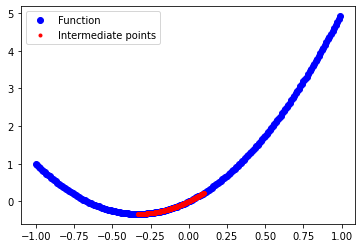

In [40]:
# grad_descent.py
# Use gradient descent to find the minimum value of a singel variable function. 
# This also checks for the existence of a solution for the equation f'(x)=0 and 
# plots the intermediate points traversed.

from sympy import Derivative, Symbol, sympify, solve
import matplotlib.pyplot as plt

def grad_descent(x0, f1x, x):
  # check if fix=0 has a solution
  if not solve(f1x):
    print('Cannot continue, solution for {0}=0 does not exist'. format(fix))
    return None
  epsilon = 1e-6
  step_size = 1e-4
  x_old = x0
  x_new = x_old-step_size*f1x.subs({x: x_old}).evalf()

  # list to store the X values traversed
  X_traversed = []
  while abs(x_old - x_new) > epsilon:
    X_traversed.append(x_new)
    x_old = x_new
    x_new = x_old - step_size*f1x.subs({x:x_old}).evalf()

  return x_new, X_traversed

def frange(start, final, interval):

    numbers = []
    while start < final:
      numbers.append(start)
      start = start + interval

    return numbers

def create_plot(X_traversed, f, var):
    # First create the graph of the function itself
    x_val = frange(-1, 1, 0.01)
    f_val = [f.subs({var:x}) for x in x_val]
    plt.plot(x_val, f_val, 'bo')
    # calculate the function value at each of the intermediate
    # points traversed
    f_traversed = [f.subs({var:x}) for x in X_traversed]
    plt.plot(X_traversed, f_traversed, 'r.')
    plt.legend(['Function', 'Intermediate points'], loc='best')
    plt.show()

if __name__ == '__main__':

      f = input('Enter a function in one variable: ')
      var = input('Enter the variable to differentiate with respect to: ')
      var0 = float(input('Enter the initial value of the variable: '))
      try:
        f = sympify(f)
      except SympifyError:
        print('Invalid function entered')
      else:
        var = Symbol(var)
        d = Derivative(f, var).doit()
        var_min, X_traversed = grad_descent(var0, d, var)
        if var_min:
          print('{0}: {1}'.format(var.name, var_min))
          print('Minimum value: {0}'.format(f.subs({var:var_min})))
        create_plot(X_traversed, f, var)


